# Entrega 1 - Proyecto Sistemas Inteligentes

- Jorge Luis Quintero Medina
- Diego Alejandro Mendoza 

## Paquetes / Librerias

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score

## Cargue del conjunto de datos

In [4]:
transactions = pd.read_csv('https://drive.google.com/uc?id=1YwTxO0egA4L-LCoL8jKeza2ARw0R7u-f')
shops = pd.read_csv('https://drive.google.com/uc?id=19r0S9UEhUDjhU7UvVTNAY5dllBtJM-Sn')
items = pd.read_csv('https://drive.google.com/uc?id=1eaD1iu7XzXHb1CDZr3tKC7MJvSe3iRst')
integrations_dataset = transactions.join(shops, on='shop_id', rsuffix='_').join(items, on='item_id', rsuffix='_').drop(['shop_id_', 'item_id_'], axis=1)
test_dataset = pd.read_csv('https://drive.google.com/uc?id=1hyW4TkC__ElwarzDWcSd0rqpqqm58YMA')\

In [5]:
integrations_dataset.head(5)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   

                shop_name                                 item_name  \
0  Ярославль ТЦ "Альтаир"                         ЯВЛЕНИЕ 2012 (BD)   
1     Москва ТРК "Атриум"  DEEP PURPLE  The House Of Blue Light  LP   
2     Москва ТРК "Атриум"  DEEP PURPLE  The House Of Blue Light  LP   
3     Москва ТРК "Атриум"  DEEP PURPLE  Who Do You Think We Are  LP   
4     Москва ТРК "Атриум"   DEEP PURPLE 30 Very Best Of 2CD (Фирм.)   

   item_category_id  
0                37  
1                58  
2                58  
3                58  
4                56

## Analisis de los datos

### Exploracion de los datos


#### Analisis por tienda

- Se observa una gran desbalanceo entre las transacciones por tienda, lo que sin duda esta relacionado con que unas tiendas venden mas que otras.

In [6]:
print(f'Hay {int(len(integrations_dataset["shop_id"].unique()))} locales diferentes')

Hay 60 locales diferentes


In [7]:
integrations_dataset['shop_id'].hist()

In [8]:
best_seller_shop_id = integrations_dataset["shop_id"].value_counts().index[0]
total_transactions_best_seller = integrations_dataset.loc[integrations_dataset["shop_id"] == best_seller_shop_id]
solds_percentage_best_seller = (len(total_transactions_best_seller)/len(integrations_dataset))*100
print(f'La tienda con mas ventas es {best_seller_shop_id} con un de {int(solds_percentage_best_seller)}% de las transacciones en el conjunto de datos')

La tienda con mas ventas es 31 con un de 8% de las transacciones en el conjunto de datos


In [9]:
worst_seller_shop_id = integrations_dataset["shop_id"].value_counts().index[-1]
total_transactions_worst_seller = integrations_dataset.loc[integrations_dataset["shop_id"] == worst_seller_shop_id]
solds_percentage_worst_seller = (len(total_transactions_worst_seller)/len(integrations_dataset))*100
print(f'La tienda con menos ventas es {worst_seller_shop_id} con un de {solds_percentage_worst_seller}% de las transacciones en el conjunto de datos')

La tienda con menos ventas es 36 con un de 0.010422879378333149% de las transacciones en el conjunto de datos


#### Analisis por productos


In [10]:
print(f'Existen {len(integrations_dataset["item_id"].unique())} productos diferentes en el conjunto de datos')

Existen 21807 productos diferentes en el conjunto de datos


In [11]:
item_id_value_counts = integrations_dataset["item_id"].value_counts()
most_sold_product = item_id_value_counts.index[0]
print(f'El producto con mas ventas es el {most_sold_product} con un total de {item_id_value_counts[most_sold_product]}')

El producto con mas ventas es el 20949 con un total de 31340


In [12]:
item_id_value_counts = integrations_dataset["item_id"].value_counts()
less_sold_product = item_id_value_counts.index[-1]
print(f'El producto con menos ventas es el {less_sold_product} con un total de {item_id_value_counts[less_sold_product]}')

El producto con menos ventas es el 7640 con un total de 1


#### Analisis precio y cantidad

In [13]:
print(integrations_dataset["item_price"].min())
print(integrations_dataset["item_price"].max())
print(integrations_dataset["item_cnt_day"].min())
print(integrations_dataset["item_cnt_day"].max())

-1.0
307980.0
-22.0
2169.0


### Limpieza/Ingenieria de datos

In [14]:
integrations_dataset["item_price"] = np.abs(integrations_dataset["item_price"])
integrations_dataset["item_cnt_day"] = np.abs(integrations_dataset["item_cnt_day"])

In [15]:
integrations_dataset['date'] = pd.to_datetime(integrations_dataset['date'], format='%d.%m.%Y')
integrations_dataset['day'] = integrations_dataset['date'].dt.day
integrations_dataset['month'] = integrations_dataset['date'].dt.month
integrations_dataset['year'] = integrations_dataset['date'].dt.year
integrations_dataset.drop('date', axis=1, inplace=True)
integrations_dataset.head()

date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0               0       59    22154      999.00           1.0   
1               0       25     2552      899.00           1.0   
2               0       25     2552      899.00           1.0   
3               0       25     2554     1709.05           1.0   
4               0       25     2555     1099.00           1.0   

                shop_name                                 item_name  \
0  Ярославль ТЦ "Альтаир"                         ЯВЛЕНИЕ 2012 (BD)   
1     Москва ТРК "Атриум"  DEEP PURPLE  The House Of Blue Light  LP   
2     Москва ТРК "Атриум"  DEEP PURPLE  The House Of Blue Light  LP   
3     Москва ТРК "Атриум"  DEEP PURPLE  Who Do You Think We Are  LP   
4     Москва ТРК "Атриум"   DEEP PURPLE 30 Very Best Of 2CD (Фирм.)   

   item_category_id  day  month  year  
0                37    2      1  2013  
1                58    3      1  2013  
2                58    5      1  2013  
3                58    6      1  2013  
4                56   15      1  2013

In [16]:
monthly_sales = integrations_dataset[["month", "date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", "item_category_id", "year"]].groupby(['date_block_num',"shop_id", "item_id", "item_category_id"]).agg({"item_price":"mean","item_cnt_day":"sum","month":"min", "year":"min"}).reset_index()
monthly_sales.rename(columns={"item_cnt_day":"item_cnt_month"},inplace=True)

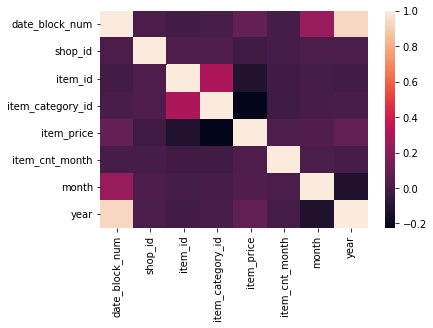

In [17]:
sns.heatmap(monthly_sales.corr())

In [18]:
rcParams['figure.figsize'] = 20,20
sns.barplot(x = 'item_category_id', y = 'item_id', data = monthly_sales)
plt.xlabel('Item Category', fontsize = 25)
plt.ylabel('Item', fontsize = 25)
plt.show()

In [19]:
monthly_sales = monthly_sales[monthly_sales['item_cnt_month']>0]
monthly_sales = monthly_sales[monthly_sales['item_price'] < 100000]
monthly_sales.head()

date_block_num  shop_id  item_id  item_category_id  item_price  \
0               0        0       32                40       221.0   
1               0        0       33                37       347.0   
2               0        0       35                40       247.0   
3               0        0       43                40       221.0   
4               0        0       51                57       128.5   

   item_cnt_month  month  year  
0             6.0      1  2013  
1             3.0      1  2013  
2             1.0      1  2013  
3             1.0      1  2013  
4             2.0      1  2013

In [20]:
test_shop_ids = test_dataset['shop_id'].unique()
test_item_ids = test_dataset['item_id'].unique()
train_in_test = monthly_sales[monthly_sales['shop_id'].isin(test_shop_ids)]
train_in_test = monthly_sales[monthly_sales['item_id'].isin(test_item_ids)]

In [21]:
train_in_test.shape

(704403, 8)